In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset1=pd.read_csv("../Data Science/data/Appstore.csv")
dataset1.head()

,id,App Name,size_bytes,currency,price,rating_count_tot,rating_count_ver,Rating,user_rating_ver,ver,cont_rating,Category,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


### Checking if there are any null values in dataset

In [3]:
dataset1.isnull().sum()

id                  0
App Name            0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
Rating              0
user_rating_ver     0
ver                 0
cont_rating         0
Category            0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [4]:
dataset1.shape

(7197, 16)

In [5]:
dataset1.info

<bound method DataFrame.info of               id                                      App Name  size_bytes  \
0      284882215                                      Facebook   389879808   
1      389801252                                     Instagram   113954816   
2      529479190                                Clash of Clans   116476928   
3      420009108                                    Temple Run    65921024   
4      284035177                       Pandora - Music & Radio   130242560   
...          ...                                           ...         ...   
7192  1170406182  Shark Boom - Challenge Friends with your Pet   245415936   
7193  1069830936                           【謎解き】ヤミすぎ彼女からのメッセージ    16808960   
7194  1070052833                                    Go!Go!Cat!    91468800   
7195  1081295232   Suppin Detective: Expose their true visage!    83026944   
7196   977965019           みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~    51174400   

     currency  price  rating_co

## Cleaning of data from IOS app store

### Removing duplicate data

In [6]:
dataset1.drop_duplicates()
dataset1.head()

,id,App Name,size_bytes,currency,price,rating_count_tot,rating_count_ver,Rating,user_rating_ver,ver,cont_rating,Category,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


### dropping columns from dataset which are not required

In [7]:
dataset1=dataset1.drop(["id","currency","rating_count_tot","rating_count_ver","sup_devices.num","ipadSc_urls.num","lang.num","vpp_lic"],1)

In [8]:
dataset1.head(5)

,App Name,size_bytes,price,Rating,user_rating_ver,ver,cont_rating,Category
0,Facebook,389879808,0.0,3.5,3.5,95,4+,Social Networking
1,Instagram,113954816,0.0,4.5,4.0,10.23,12+,Photo & Video
2,Clash of Clans,116476928,0.0,4.5,4.5,9.24.12,9+,Games
3,Temple Run,65921024,0.0,4.5,4.0,1.6.2,9+,Games
4,Pandora - Music & Radio,130242560,0.0,4.0,4.5,8.4.1,12+,Music


### Removing unwanted characterisitcs from Price

In [9]:
dataset1['price'] = dataset1['price'].astype(str)
dataset1['price'] = dataset1['price'].str.replace("$", ' ')

## Loading Andriod playstore data

In [10]:
dataset2=pd.read_csv("../Data Science/data/playstore.csv")
dataset2.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device


In [11]:
dataset2.shape

(31999, 11)

In [12]:
dataset2=dataset2.drop(["Reviews","Last Updated","Minimum Version","Latest Version",],1)

## Cleaning of playstore data

### Chaging price name to match with google play store columns

In [13]:
dataset2.rename(columns={'Price':'price'}, inplace=True)

In [14]:
dataset2

,App Name,Category,Rating,Installs,Size,price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,"5,000,000+",Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,"100,000,000+",Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,"100,000+",1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,"10,000,000+",16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,"10,000+",Varies with device,$5.99,Everyone
...,...,...,...,...,...,...,...
31994,KG Newsroom,NEWS_AND_MAGAZINES,4.5,50+,9.6M,0,Everyone
31995,Dedi App 19,GAME_SIMULATION,3.521126747,"10,000+",6.5M,0,Everyone
31996,Dedi App 17,GAME_SIMULATION,3.994588852,"100,000+",7.9M,0,Everyone
31997,Right Angle Triangle Solver,TOOLS,4.25,"100,000+",6.8M,0,Everyone


In [15]:
dataset2.isnull().sum()

App Name          0
Category          0
Rating            0
Installs          0
Size              0
price             0
Content Rating    0
dtype: int64

In [16]:
dataset2.shape

(31999, 7)

### Removing duplicate data from playstore data

In [17]:
dataset2.drop_duplicates()
dataset2.head(5)

,App Name,Category,Rating,Installs,Size,price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,"5,000,000+",Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,"100,000,000+",Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,"100,000+",1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,"10,000,000+",16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,"10,000+",Varies with device,$5.99,Everyone


### Removing unwanted data from Installs column

In [18]:
dataset2.Installs = dataset2['Installs'].map(lambda x: x.rstrip('+').replace(',','').replace('Free', '0'))

In [19]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App Name        31999 non-null  object
 1   Category        31999 non-null  object
 2   Rating          31999 non-null  object
 3   Installs        31999 non-null  object
 4   Size            31999 non-null  object
 5   price           31999 non-null  object
 6   Content Rating  31999 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


In [20]:
dataset2.shape

(31999, 7)

In [21]:
dataset2.head(5)

,App Name,Category,Rating,Installs,Size,price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,5000000,Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,100000000,Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329393,100000,1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,10000000,16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,10000,Varies with device,$5.99,Everyone


In [22]:
dataset2.Rating.describe()

count     31999
unique    25434
top           5
freq       1014
Name: Rating, dtype: object

In [23]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App Name        31999 non-null  object
 1   Category        31999 non-null  object
 2   Rating          31999 non-null  object
 3   Installs        31999 non-null  object
 4   Size            31999 non-null  object
 5   price           31999 non-null  object
 6   Content Rating  31999 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


In [24]:
dataset2["Rating"] = pd.to_numeric(dataset2.Rating, errors='coerce')

In [25]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App Name        31999 non-null  object 
 1   Category        31999 non-null  object 
 2   Rating          31997 non-null  float64
 3   Installs        31999 non-null  object 
 4   Size            31999 non-null  object 
 5   price           31999 non-null  object 
 6   Content Rating  31999 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


In [26]:
dataset2.head(5)

,App Name,Category,Rating,Installs,Size,price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,5000000,Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,100000000,Varies with device,0,Everyone
2,Peapod,SHOPPING,3.656329,100000,1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,10000000,16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,10000,Varies with device,$5.99,Everyone


## Rounding of Rating column upto one decimal

In [27]:
dataset2.Rating = dataset2['Rating'].round(decimals=1)
dataset2.head(5)

,App Name,Category,Rating,Installs,Size,price,Content Rating
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.5,5000000,Varies with device,0,Everyone
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.4,100000000,Varies with device,0,Everyone
2,Peapod,SHOPPING,3.7,100000,1.4M,0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.1,10000000,16M,0,Everyone
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.6,10000,Varies with device,$5.99,Everyone


## Removing unwanted characteristics from price from android playstore

In [28]:
dataset2['price'] = dataset2['price'].astype(str)
dataset2['price'] = dataset2['price'].str.replace("$", ' ')

## Merging of two appstore and playstore datasets

In [29]:
dataset3=pd.merge(dataset1, dataset2, on='App Name')
dataset3.sample(20)

,App Name,size_bytes,price_x,Rating_x,user_rating_ver,ver,cont_rating,Category_x,Category_y,Rating_y,Installs,Size,price_y,Content Rating
262,Wedding Dash Deluxe,55803904,0.99,4.5,4.5,2.29.13,4+,Games,GAME_CASUAL,3.8,50000,45M,1.99,Everyone
449,FINAL FANTASY VI,698171392,14.99,4.5,4.5,2.0.4,9+,Games,GAME_ROLE_PLAYING,4.4,100000,10M,15.99,Teen
608,Amazon Prime Now,48007168,0.0,3.0,1.0,4,4+,Shopping,SHOPPING,3.9,10000000,38M,0,Teen
216,Five Nights at Freddy's,49946624,2.99,4.5,4.5,1,12+,Games,GAME_ACTION,4.6,1000000,50M,2.99,Teen
157,Criminal Case,131917824,0.0,4.5,4.5,1.16,12+,Games,GAME_ADVENTURE,4.5,100000000,Varies with device,0,Teen
481,Icycle: On Thin Ice,82700288,2.99,4.5,4.5,2.0.3,4+,Games,GAME_ADVENTURE,4.3,1000,62M,2.99,Teen
408,Hopscotch,117678080,0.0,4.5,4.0,3.16.0,4+,Education,GAME_ARCADE,3.9,1000000,22M,0,Everyone
704,F1 2016,2532376576,4.99,4.0,4.0,1.0.6,4+,Games,GAME_RACING,4.1,100000,80M,1.99,Everyone
616,Outback,73947136,0.0,4.5,4.5,2.3.1,12+,Food & Drink,FOOD_AND_DRINK,4.5,500000,95M,0,Everyone
834,Hey Duggee: The Tinsel Badge,97004544,0.0,4.5,4.0,1.2,4+,Games,GAME_EDUCATIONAL,4.2,500000,54M,0,Everyone


## Combining Category and rating columns from both the datasets into one column

In [30]:
dataset3["Category"] = dataset3["Category_x"] + dataset3["Category_y"]
dataset3["Rating"] = dataset3["Rating_x"] + dataset3["Rating_y"]
dataset3["price"] = dataset3["price_x"] + dataset3["price_y"]
dataset3.head()


,App Name,size_bytes,price_x,Rating_x,user_rating_ver,ver,cont_rating,Category_x,Category_y,Rating_y,Installs,Size,price_y,Content Rating,Category,Rating,price
0,Facebook,389879808,0.0,3.5,3.5,95,4+,Social Networking,SOCIAL,4.1,1000000000,Varies with device,0,Teen,Social NetworkingSOCIAL,7.6,0.00
1,Instagram,113954816,0.0,4.5,4.0,10.23,12+,Photo & Video,SOCIAL,4.5,1000000000,Varies with device,0,Teen,Photo & VideoSOCIAL,9.0,0.00
2,Clash of Clans,116476928,0.0,4.5,4.5,9.24.12,9+,Games,GAME_STRATEGY,4.6,500000000,103M,0,Everyone 10+,GamesGAME_STRATEGY,9.1,0.00
3,Temple Run,65921024,0.0,4.5,4.0,1.6.2,9+,Games,GAME_ARCADE,4.3,100000000,43M,0,Everyone,GamesGAME_ARCADE,8.8,0.00
4,Pinterest,74778624,0.0,4.5,4.0,6.26,12+,Social Networking,SOCIAL,4.6,100000000,Varies with device,0,Teen,Social NetworkingSOCIAL,9.1,0.00


## Analysing which app got highest numbr of installs from both ios and android play stores

In [31]:
dataset3.sort_values(by='Installs', ascending=False).head(5)

,App Name,size_bytes,price_x,Rating_x,user_rating_ver,ver,cont_rating,Category_x,Category_y,Rating_y,Installs,Size,price_y,Content Rating,Category,Rating,price
55,Twitter,210569216,0.0,3.5,4.0,6.79.1,17+,News,NEWS_AND_MAGAZINES,4.3,500000000,Varies with device,0,Mature 17+,NewsNEWS_AND_MAGAZINES,7.8,0.00
57,Snapchat,203038720,0.0,2.5,3.0,10.9.2.0,12+,Photo & Video,SOCIAL,4.1,500000000,56M,0,Teen,Photo & VideoSOCIAL,6.6,0.00
219,Google Translate,65281024,0.0,3.5,4.5,5.10.0,4+,Reference,TOOLS,4.4,500000000,Varies with device,0,Everyone,ReferenceTOOLS,7.9,0.00
120,Hill Climb Racing,108322816,0.0,4.5,4.5,1.33.0,9+,Games,GAME_RACING,4.4,500000000,64M,0,Everyone,GamesGAME_RACING,8.9,0.00
111,My Talking Tom,255747072,0.0,4.5,4.5,4.1.2,4+,Games,GAME_CASUAL,4.5,500000000,Varies with device,0,Everyone,GamesGAME_CASUAL,9.0,0.00


## How many apps fall under different content ratings

In [32]:
dataset3.groupby(['Content Rating']).size()

Content Rating
Everyone        596
Everyone 10+    104
Mature 17+       19
Teen            142
dtype: int64

## App with largest number of rating

In [33]:
dataset3['Rating'] = pd.to_numeric(dataset3['Rating'],errors='coerce')
dataset3.sort_values('Rating',ascending=False).iloc[0]['App Name']

'The Room Three'

## Apps with largest number of installs

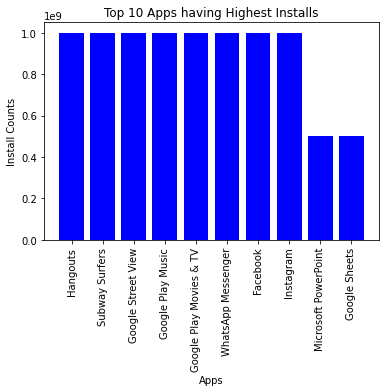

In [34]:
import matplotlib.pyplot as plt
dataset3['Installs'] = dataset3['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
i = dataset3[dataset3['Category'] == '1.9'].index
dataset3.loc[i]
dataset3 = dataset3.drop(i)

dataset3['Installs'] = dataset3['Installs'].astype(int)
res = dataset3.groupby('App Name')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App Name", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

## Apps with largest size from IOS and andriod playstores

In [35]:
dataset3.sort_values('Size',ascending=False)
# there are 1695 rows having  string "Varies with device"
dataset3.loc[dataset3['Size'] == 'Varies with device'].shape

unwanted = dataset3.loc[dataset3['Size'] == 'Varies with device']
unwanted.shape
dataset3.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
dataset3['Size'] = dataset3['Size'].apply(lambda x: str(x).replace('M',''))
dataset3['Size'] = dataset3['Size'].apply(lambda x: str(x).replace('k',''))
dataset3['Size'] = dataset3['Size'].apply(lambda x: str(x).replace('+',''))

dataset3.sort_values('Size',ascending=False).head()
#Converting Size column to numerics
dataset3['Size'] = pd.to_numeric(dataset3['Size'],errors='coerce')
dataset3.sort_values('Size', ascending=False).iloc[0]['App Name']


'Agent A: A puzzle in disguise'

## Most Popular Categories in IOS and Android play stores

Text(0, 0.5, 'Size')

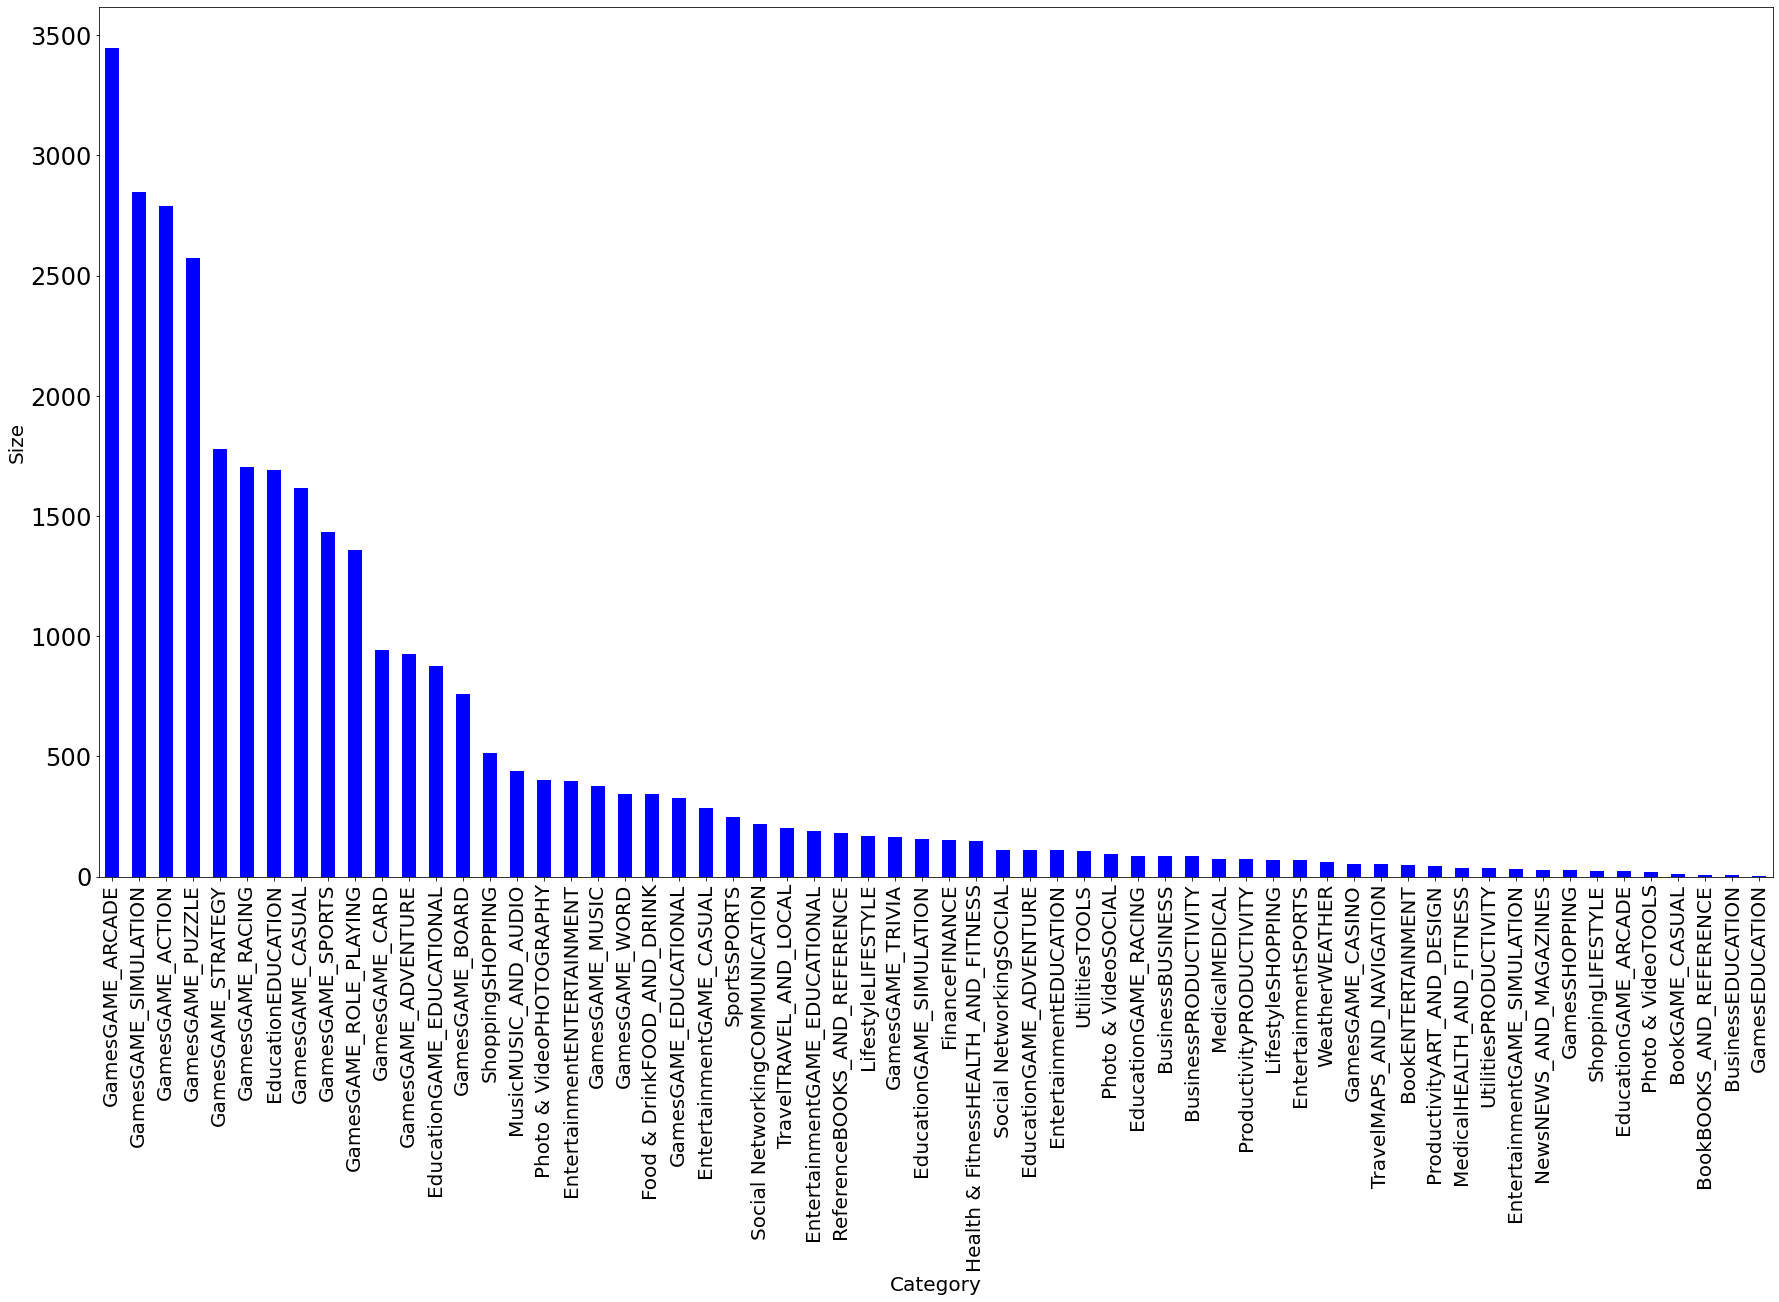

In [36]:

import warnings
warnings.filterwarnings('ignore')
dataset3.loc[dataset3['Size'] == 'Varies with device'].shape
unwanted = dataset3.loc[dataset3['Size'] == 'Varies with device']
unwanted.shape
dataset3.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
dataset3['Size'] = dataset3['Size'].apply(lambda x: str(x).replace('M',''))
dataset3['Size'] = dataset3['Size'].apply(lambda x: str(x).replace('k',''))
dataset3['Size'] = dataset3['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
dataset3['Size'] = pd.to_numeric(dataset3['Size'],errors='coerce')
res = dataset3.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)